# Absorber Thickness


Beam of 5.000.000 particles

Cross Sections:

```
Photoelectric *10 
Scattering Compton * 10
```


In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


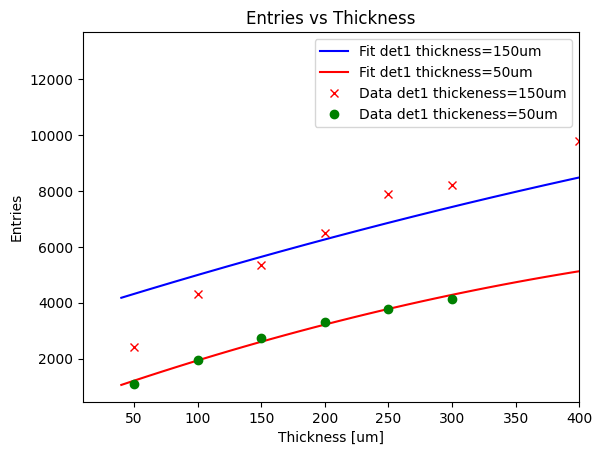

In [10]:
thickness_150 = [50, 100, 150, 200, 250, 300, 400, 500, 600, 800, 1000, 1500, 2000]
#thickness_150 = [50, 100, 150, 200, 250, 300]
entries_150 = []
thickness_50 = [50, 100, 150, 200, 250, 300, 1000]
#thickness_50 = [50, 100, 150, 200, 250, 300]
entries_50 = []

for i in thickness_150:
    file = ROOT.TFile.Open(f"{i}um.root")
    entries_150.append(file.ComptonHits.GetEntries())

for i in thickness_50:
    file = ROOT.TFile.Open(f"50um_{i}um.root")
    entries_50.append(file.ComptonHits.GetEntries())
    
thickness_150 = np.array(thickness_150)
entries_150 = np.array(entries_150)

pol_150 = np.polyfit(thickness_150, entries_150, 2)
pol_50 = np.polyfit(thickness_50, entries_50, 2)

x_plot_150 = np.linspace(thickness_150[0]-10, thickness_150[-1]+100, 100)
y_plot_150 = np.polyval(pol_150, x_plot_150)

x_plot_50 = np.linspace(thickness_50[0]-10, thickness_50[-1]+100, 100)
y_plot_50 = np.polyval(pol_50, x_plot_50)

plt.plot(x_plot_150, y_plot_150, c = 'b', label = "Fit det1 thickness=150um")
plt.plot(x_plot_50, y_plot_50, c = 'r', label = "Fit det1 thickness=50um")

plt.plot(thickness_150, entries_150, 'x', c = 'r' , label = "Data det1 thickeness=150um")
plt.plot(thickness_50, entries_50, 'o', c = 'g' , label = "Data det1 thickeness=50um")
plt.xlabel("Thickness [um]")
plt.ylabel("Entries")
plt.title("Entries vs Thickness")
plt.legend(loc='best')
# Change axis limits
plt.xlim(10,400)
plt.show()

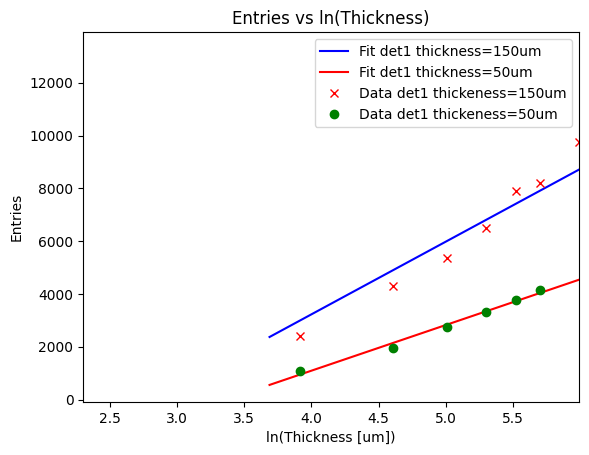

In [9]:
thickness_150_log = np.log(thickness_150)
thickness_50_log = np.log(thickness_50)

pol_log = np.polyfit(thickness_150_log, entries_150, 1)
x_plot_150_log = np.log(x_plot_150)
y_plot_150_log = np.polyval(pol_log, x_plot_150_log)
plt.plot(x_plot_150_log, y_plot_150_log, c = 'b', label = "Fit det1 thickness=150um")

pol_log_50 = np.polyfit(thickness_50_log, entries_50, 1)
x_plot_50_log = np.log(x_plot_50)
y_plot_50_log = np.polyval(pol_log_50, x_plot_50_log)
plt.plot(x_plot_50_log, y_plot_50_log, c = 'r', label = "Fit det1 thickness=50um")

plt.plot(thickness_150_log, entries_150, 'x', c = 'r', label = "Data det1 thickeness=150um")
plt.plot(thickness_50_log, entries_50, 'o', c = 'g', label = "Data det1 thickeness=50um")
plt.xlabel("ln(Thickness [um])")
plt.ylabel("Entries")
plt.title("Entries vs ln(Thickness)")
plt.legend(loc="best")
plt.xlim(np.log(10), np.log(400))
plt.show()

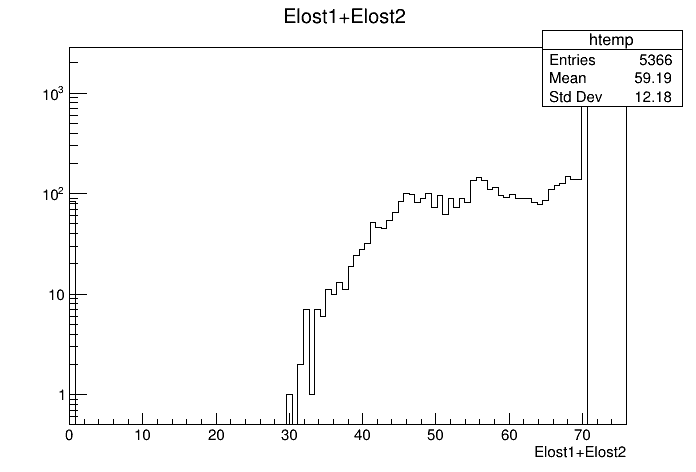

In [33]:
file = ROOT.TFile.Open("150um.root")
c1 = ROOT.TCanvas()
c1.SetLogy()
file.ComptonHits.Draw("Elost1+Elost2","","")
c1.Draw()

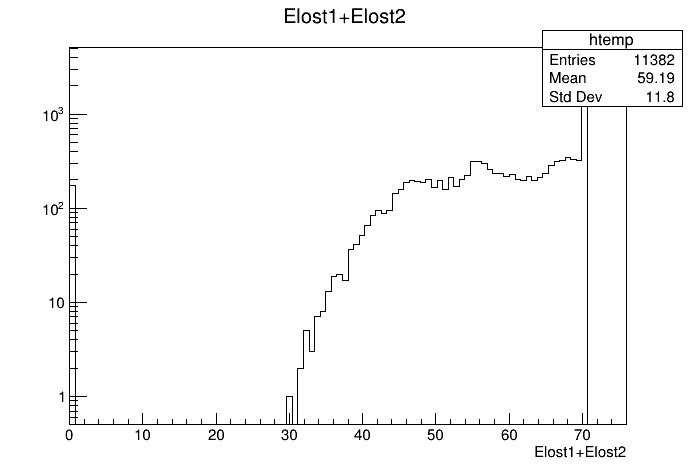

In [18]:
file = ROOT.TFile.Open("1000um.root")
c1 = ROOT.TCanvas()
c1.SetLogy()
file.ComptonHits.Draw("Elost1+Elost2","","")
c1.Draw()

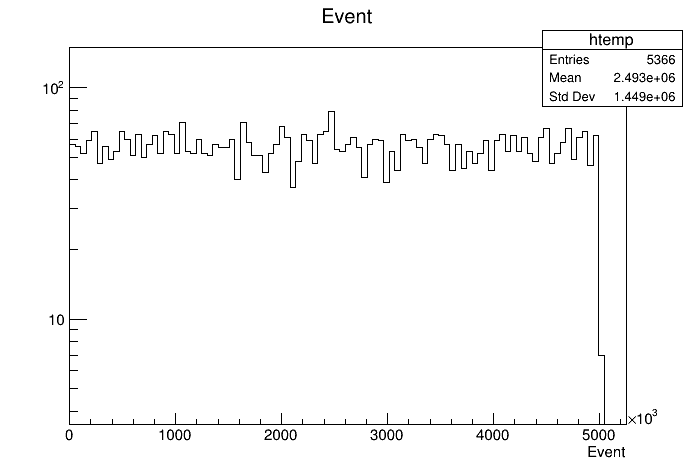

In [5]:
file = ROOT.TFile.Open("150um.root")
c1 = ROOT.TCanvas()
c1.SetLogy()
file.ComptonHits.Draw("Event","","")
c1.Draw()